## Explorasi Data Iris


=== Isi file: Data/PetalLength.csv ===


,PetalLength_Max,PetalLength_Min,PetalLength_Avg
0,6.9,1,3.758667


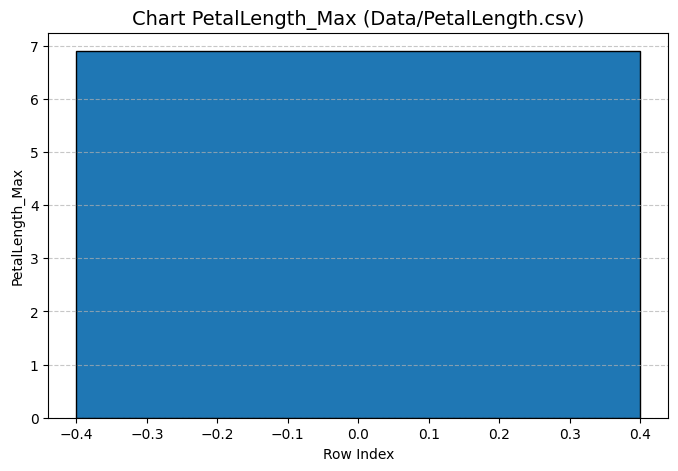


=== Isi file: Data/PetalWidth.csv ===


,PetalWidth_Avg,PetalWidth_Max,PetalWidth_Min
0,1.198667,2.5,0.1


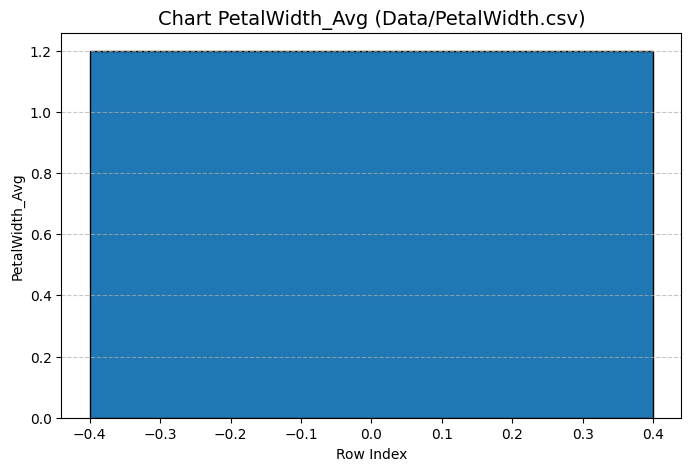


=== Isi file: Data/SepalLength.csv ===


,SepalLength_Avg,SepalLength_Max,SepalLength_Min
0,5.843333,7.9,4.3


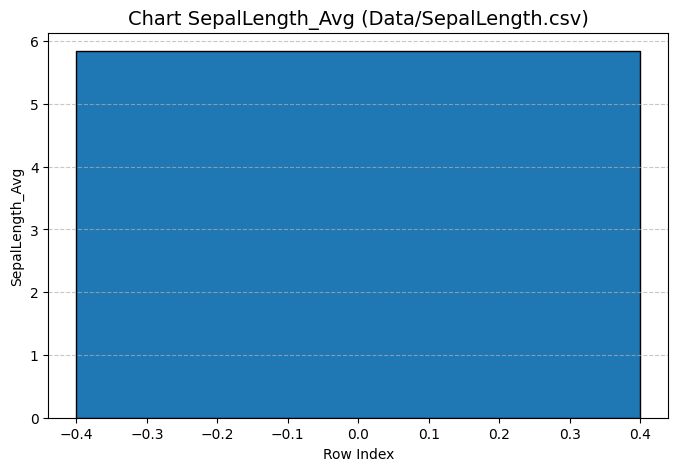


=== Isi file: Data/SepalWidth.csv ===


,SepalWidth_Avg,SepalWidth_Max,SepalWidth_Min
0,3.054,4.4,2


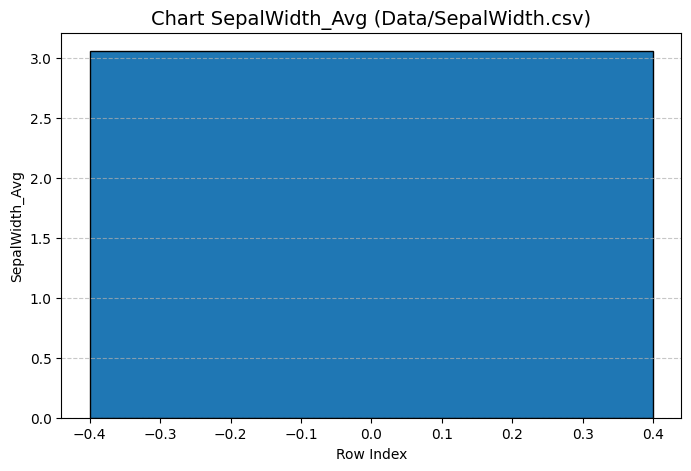


=== Isi file: Data/Species.csv ===


,Species,Count of Species
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


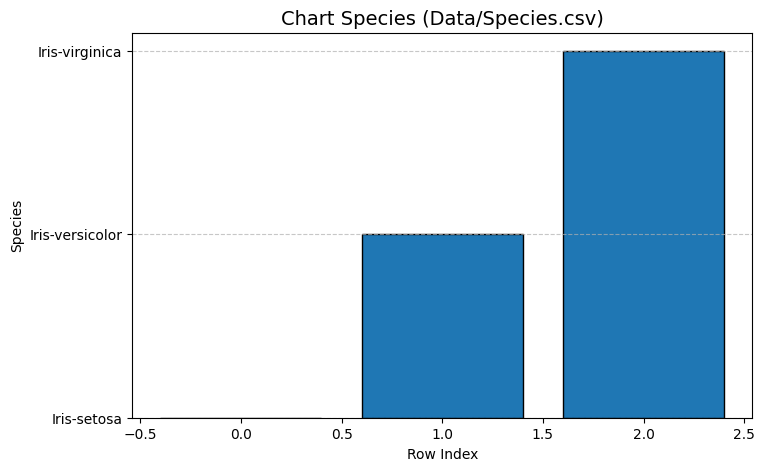

In [8]:
# === 1. Import library ===
import pandas as pd
import matplotlib.pyplot as plt

# === 2. Daftar CSV ===
file_names = [
    "Data/PetalLength.csv",
    "Data/PetalWidth.csv",
    "Data/SepalLength.csv",
    "Data/SepalWidth.csv",
    "Data/Species.csv"
]

# === 3. Loop setiap CSV ===
for f in file_names:
    print(f"\n=== Isi file: {f} ===")
    df = pd.read_csv(f)
    display(df)  # tampilkan isi CSV di tabel Jupyter
    
    # === Buat chart ===
    plt.figure(figsize=(8,5))

    # Kalau kolom numerik → bar chart nilainya
    if df.select_dtypes(include=["number"]).shape[1] > 0:
        col = df.columns[0]
        plt.bar(df.index, df[col], color="#1f77b4", edgecolor="black")
        plt.title(f"Chart {col} ({f})", fontsize=14)
        plt.xlabel("Row Index")
        plt.ylabel(col)

    # Kalau kolom kategori (misalnya Species) → hitung frekuensi
    else:
        col = df.columns[0]
        kelas_count = df[col].value_counts()
        plt.bar(kelas_count.index, kelas_count.values, color="#ff7f0e", edgecolor="black")
        plt.title(f"Chart {col} ({f})", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Count")

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


## Sepal_Petal

## Script Untuk Menarik Data ke Power BI

In [ ]:
import pandas as pd
import mysql.connector
import psycopg2

# === MySQL ===
conn_mysql = mysql.connector.connect(
    host="localhost",
    user="root",
    password="passwordku",
    database="mydata"
)
df_mysql = pd.read_sql("SELECT * FROM sepal;", conn_mysql)
conn_mysql.close()

# === PostgreSQL ===
conn_pg = psycopg2.connect(
    host="localhost",
    user="postgres",
    password="passwordku",
    dbname="petal"
)
df_pg = pd.read_sql("SELECT * FROM petal_data;", conn_pg)
conn_pg.close()

# === Gabungkan ===
df_all = pd.concat([df_mysql, df_pg], axis=0)

# output ke Power BI
dataset = df_all



=== Isi file: Data/Sepal-Petal.csv ===


,Jumlah sebesar sepal length,Jumlah sebesar sepal width,class
0,329.4,148.7,Iris-virginica
1,296.8,138.5,Iris-versicolor
2,250.3,170.9,Iris-setosa


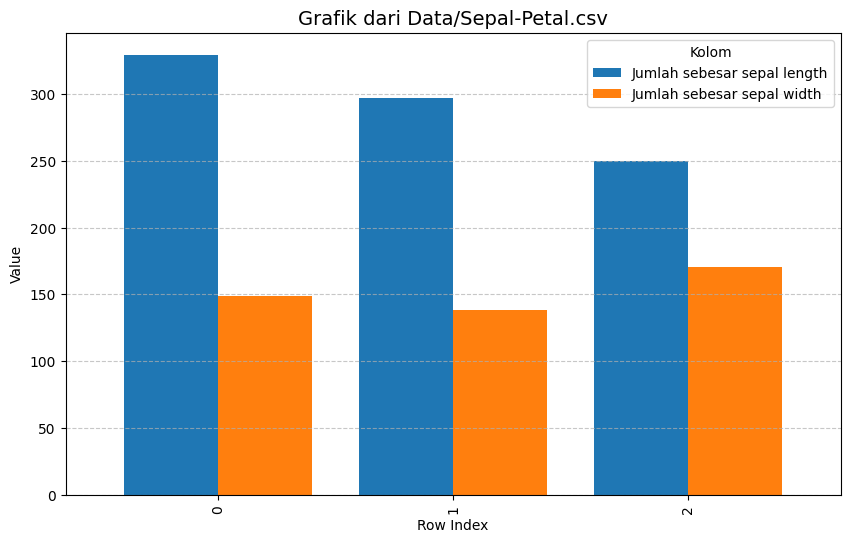


=== Isi file: Data/Petal-Sepal.csv ===


,Jumlah sebesar petal_length,Jumlah sebesar petal_width,class
0,277.6,101.3,Iris-virginica
1,213.0,66.3,Iris-versicolor
2,73.2,12.2,Iris-setosa


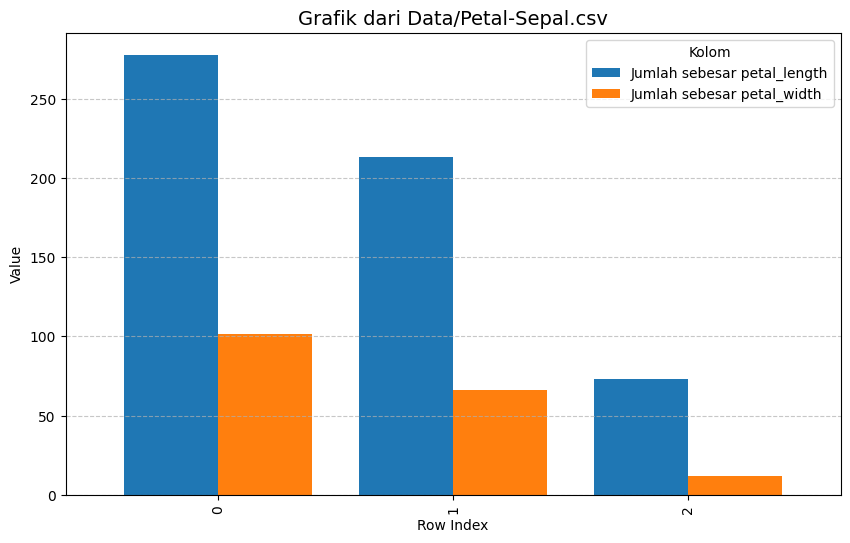

In [1]:
# === 1. Import library ===
import pandas as pd
import matplotlib.pyplot as plt

# === 2. Daftar CSV ===
file_names = ["Data/Sepal-Petal.csv", "Data/Petal-Sepal.csv"]

# === 3. Loop tiap CSV ===
for f in file_names:
    print(f"\n=== Isi file: {f} ===")
    df = pd.read_csv(f)
    display(df)  # tampilkan tabel isi CSV

    # Ambil semua kolom numerik
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()

    # === 1 Grafik per CSV ===
    ax = df[num_cols].plot(kind="bar", figsize=(10,6), width=0.8)
    plt.title(f"Grafik dari {f}", fontsize=14)
    plt.xlabel("Row Index")
    plt.ylabel("Value")
    plt.legend(title="Kolom")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
